# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


pandasDataFrame = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = pandasDataFrame['total_bedrooms'].mean()
pandasDataFrame['total_bedrooms'] = pandasDataFrame['total_bedrooms'].fillna(mean_val)
print(pandasDataFrame.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
pandasDataFrame['ocean_proximity'] = labelencoder.fit_transform(pandasDataFrame['ocean_proximity'])
print(pandasDataFrame.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [ ]:
# 2. split samples
insurance_feature = pandasDataFrame.drop('median_house_value', axis=1).values
insurance_charge = pandasDataFrame['median_house_value'].values
insurance_charge = insurance_charge / np.max(insurance_charge)

X_train,X_test,y_train,y_test = train_test_split(insurance_feature,
                                                 insurance_charge,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [35]:
#3. train the model
LinearRegressionModel = LinearRegression()

LinearRegressionModel.fit(X_train,y_train)

print("bias is "+str(LinearRegressionModel.intercept_))
print("coefficients  is "+str(LinearRegressionModel.coef_))

y_train_pred = LinearRegressionModel.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
prediction for training set:
MAE is: 0.0659986479709151
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097968
MSE is: 0.02022001958450324
RMSE is: 0.14219711524677017


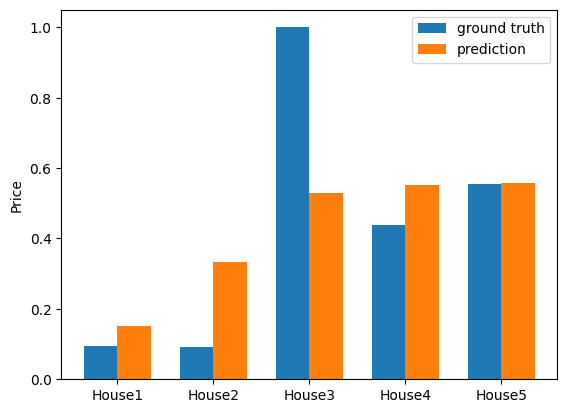

In [ ]:
#4. evaluate the model
y_test_pred = LinearRegressionModel.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [ ]:
pandasDataFrame = pd.read_csv('insurance.csv')

def isCategorialFeature(c: str) -> bool:
    return c in {"sex", "smoker", "region"}

for feature in pandasDataFrame:
    if isCategorialFeature(feature):
        pandasDataFrame[feature] = labelencoder.fit_transform(pandasDataFrame[feature])
print(pandasDataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


### 2.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [33]:
# 2. split samples
insurance_feature = pandasDataFrame.drop('charges', axis=1).values
insurance_charge = pandasDataFrame['charges'].values
insurance_charge = insurance_charge / np.max(insurance_charge)

X_train,X_test,y_train,y_test = train_test_split(insurance_feature,
                                                 insurance_charge,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 6)
(268, 6)


### 2.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [ ]:
LinearRegressionModel.fit(X_train,y_train)

print("bias is "+str(LinearRegressionModel.intercept_))
print("coefficients  is "+str(LinearRegressionModel.coef_))

y_train_pred = LinearRegressionModel.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
prediction for training set:
MAE is: 0.0659986479709151
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


### 2.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generalizes on the testing set. 

prediction for testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


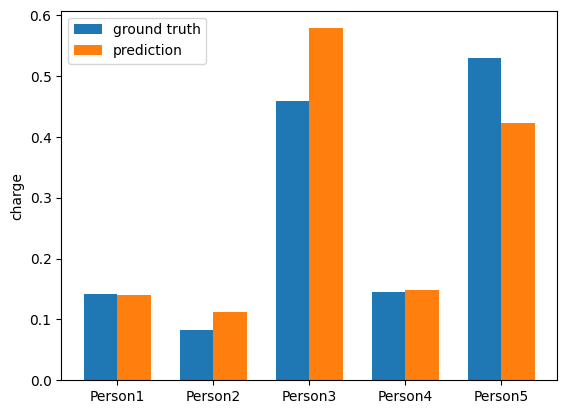

In [41]:
y_test_pred = LinearRegressionModel.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('charge')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### 2.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [9]:
# your code